# Bipartite Graphs and Networkx

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from networkx.algorithms import bipartite

## Creating a bipartite graph from an existing graph
Below is cycle C6, which will be bipartite as all even-ordered cycles are. We work with it using networkx's bipartite algorithm class to find out more.

a: {0: 1, 1: 0, 5: 0, 4: 1, 3: 0, 2: 1}
graph is bipartite: True
sets of bipartite graph: ({0, 2, 4}, {1, 3, 5})
	top nodes: {0, 2, 4}
	bottom nodes: {1, 3, 5}


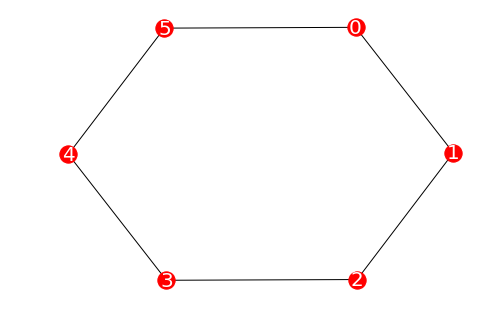

In [62]:
# cycle graph
c = nx.cycle_graph(6)

# draw graph
nx.draw(c, with_labels=True, font_size=20, font_color='white')

# top and bottom sets of nodes
top, bottom = nx.bipartite.sets(c)

print('a:',nx.bipartite.color(c))

print(f'graph is bipartite: {nx.is_bipartite(c)}')
print(f'sets of bipartite graph: {nx.bipartite.sets(c)}')
print(f'\ttop nodes: {top}')
print(f'\tbottom nodes: {bottom}')

# Creating a bipartite graph from two sets of nodes
Starting with two separate sets of nodes, we can construct a completer bipartite graph.

set C: {1, 3, 5}
set D: {0, 2, 4}


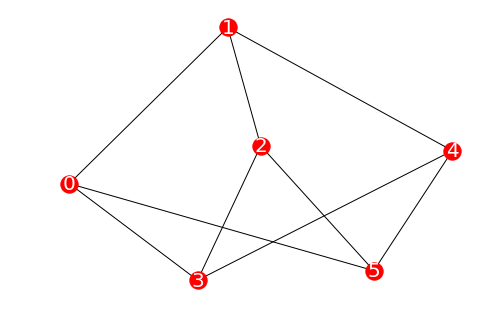

In [63]:
C = {i for i in range(6)} # set of 0-6

D = set(filter(lambda i: i % 2 == 0, C)) # set of even numbers in C

C -= D # remove even numbers from C

b = nx.complete_bipartite_graph(C,D)
print(f'set C: {C}')
print(f'set D: {D}')

# draw graph
nx.draw(b, with_labels=True, font_size=20, font_color='white')

# Creating a bipartite graph with complete_bipartite_graph
Using the number of vertices in each partition, we can construct a complete bipartite graph much like we would make a complete graph.

In [64]:
# work in progress

# n = 0

# for i in range(2,10):
#     for j in range(2,10):
#         plt.figure(n)
#         a = nx.complete_bipartite_graph(i,j)
#         print(f'figure {n} ({i,j}) sets:{nx.bipartite.sets(a)}')
#         nx.draw(a, with_labels=True)
#         n += 1

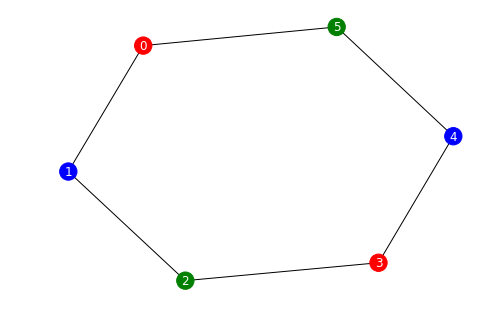

In [65]:
import random


def randGraph(condition = lambda : random.randint(1,10) % 2 == 0):
    G = nx.Graph()

    G.add_nodes_from([i for i in range(random.randint(1,10))])

    for i in G.nodes:
        for j in G.nodes:
            if condition:
                G.add_edges_from([(i,j)])
    
    return G

colors = ['red','blue','green']

# for i in range(5):
#     plt.figure(i)
#     nx.draw(randGraph(condition=lambda: random.randint(1,10) % 2 != 0), with_labels=True, font_color='white', node_color=colors)
    
H = nx.cycle_graph(6)
nx.draw(H, with_labels=True, node_color=colors, font_color='White')
    